In [1]:
import os
import numpy as np
# import gdal
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly as py
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import sys
import pandas as pd
# from pfspinup import pfio

In [2]:
RUN_NAME = "ICOM"
arr = np.loadtxt("Organized_WTD/ICOM_Obs_WTD_2003.csv",
                 delimiter=",", dtype=str)
arr = arr[1:]
obs_wtd = np.array([float(row[1]) for row in arr])
sim_wtds = np.array([float(row[2]) for row in arr])
obs_wtd

array([40.64, 37.22, 23.54, ...,  0.61,  5.49,  3.66])

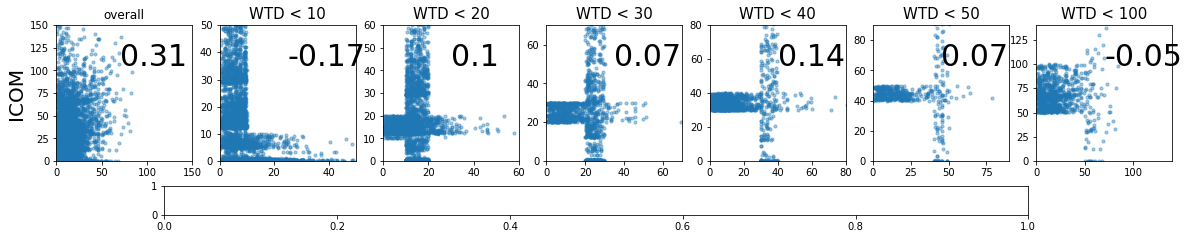

In [3]:
overall_corr = np.round(np.corrcoef(obs_wtd, sim_wtds)[0,1],2)
wtd_threshold = [0, 10, 20, 30, 40, 50, 100]

fig, axs = plt.subplots(1, 7, figsize = (20, 4))
ax0 = axs[0]
sca0 = ax0.scatter(obs_wtd, sim_wtds, alpha = 0.4, s = 10, 
			# c = sim_kis,
			norm =mpl.colors.LogNorm(1e-3, 1e-1))
# sca0 = ax0.scatter(obs_wtd, sim_wtds, alpha = 0.4, s = 10)
ax0.set_ylim(0, 150)
ax0.set_xlim(0, 150)
ax0.text(70, 105, overall_corr, size = 30)
ax0.set_aspect(1)
ax0.set_title('overall')
ax0.set_ylabel(RUN_NAME, size = 20)
#divider = make_axes_locatable(ax0)
#cax = divider.append_axes('left', size='5%', pad=0.8)
#fig.colorbar(sca0, cax=cax, orientation='vertical')

for i in range(1, 7):
	ax = axs[i]
	sel_points = np.logical_or(np.logical_and(obs_wtd > wtd_threshold[i - 1],
											  obs_wtd <= wtd_threshold[i]),
							   np.logical_and(sim_wtds > wtd_threshold[i - 1],
											  sim_wtds <= wtd_threshold[i]))
	sub_obs = obs_wtd[sel_points]
	sub_wtd = sim_wtds[sel_points]
	sub_corr = np.round(np.corrcoef(sub_obs, sub_wtd)[0,1],2)
	# sub_kis = sim_kis[sel_points]
	ax.set_title('WTD < '+str(wtd_threshold[i]), size = 15)
	ax.scatter(sub_obs, sub_wtd, alpha = 0.4, s = 10, 
			#c = sub_kis,
			norm =mpl.colors.LogNorm(1e-3, 1e-1))
	# ax.scatter(sub_obs, sub_wtd, alpha = 0.4, s = 10)
	y_max = 40 + wtd_threshold[i]
	x_max = 40 + wtd_threshold[i]
	ax.set_ylim(0, y_max)
	ax.set_xlim(0, x_max)
	ax.text(x_max * 0.5, y_max * 0.7, sub_corr, size = 30)
	ax.set_aspect(1)

cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.1])
fig.colorbar(sca0, cax=cbar_ax, orientation = 'horizontal')
plt.savefig(RUN_NAME+'_scatter.png')

#%%
### Map plot
# fig, axs = plt.subplots(1, 2, figsize = (16, 8))
# ax0 = axs[0]
# im0 = ax0.imshow(sel_mean, cmap = 'RdYlBu',
# 			norm =mpl.colors.LogNorm(1, 100))
# divider = make_axes_locatable(ax0)
# cax = divider.append_axes('left', size='5%', pad=0.8)
# fig.colorbar(im0, cax=cax, orientation='vertical')
# ax0.set_title('Simulated WTD')

# ax1 = axs[1]
# sca1 = ax1.scatter(obs_xs, obs_ys, c = (obs_wtd - sim_wtds),
# 			cmap = 'RdBu_r', s = 6, alpha = 0.6,
# 			vmin = -4, vmax = 4)
# ax1.set_aspect(1)
# ax1.invert_yaxis()
# ax1.set_title('Observation - Simulation (m)')
# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('left', size='5%', pad=0.8)
# fig.colorbar(sca1, cax=cax, orientation='vertical')

# plt.savefig(RUN_NAME+'_wtd_map.png')
